Importar librerías y configuración general

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)


Cargar los datasets

In [14]:
# Cargar datos (asumiendo que están en la carpeta data/)
df_canasta = pd.read_csv('../data/canasta_basica.csv', parse_dates=['fecha'])
df_salario = pd.read_csv('../data/salario_minimo.csv', parse_dates=['fecha'])
df_ipc = pd.read_csv('../data/indices_inflacion.csv', parse_dates=['fecha'])

# Mostrar primeras filas para verificar
display(df_canasta.head())
display(df_salario.head())
display(df_ipc.head())


,fecha,cba,cbt
0,2016-01-01,1430.06,1787.58
1,2016-02-01,2868.92,3586.15
2,2016-03-01,4553.40,5691.74
3,2016-04-01,5897.46,7371.82
4,2016-05-01,6100.74,7625.93


,fecha,smvm
0,2016-01-01,7286.40
1,2016-02-01,9737.25
2,2016-03-01,11310.70
3,2016-04-01,15205.30
4,2016-05-01,16816.11


,fecha,ipc_general,alimentos,transporte,salud,educacion,vivienda
0,2016-01-01,95.58,100.743396,92.109600,105.143104,92.709963,93.499876
1,2016-02-01,123.37,123.108398,120.164326,117.295988,118.773544,131.078272
2,2016-03-01,113.78,109.281911,126.315036,105.880214,113.279998,110.728967
3,2016-04-01,123.17,123.125171,132.527621,119.440979,124.751806,117.575421
4,2016-05-01,118.94,123.288443,128.033446,104.430439,122.864158,122.782709


Combinar datasets y preparar columnas

In [15]:
# Unir datasets por fecha
df = df_canasta.merge(df_salario, on='fecha').merge(df_ipc, on='fecha')

# Crear columnas de poder adquisitivo (cuántas canastas cubre el SMVM)
df['cba_cubierta'] = df['smvm'] / df['cba']
df['cbt_cubierta'] = df['smvm'] / df['cbt']

# Revisar que todo esté ok
display(df.head())

,fecha,cba,cbt,smvm,ipc_general,alimentos,transporte,salud,educacion,vivienda,cba_cubierta,cbt_cubierta
0,2016-01-01,1430.06,1787.58,7286.40,95.58,100.743396,92.109600,105.143104,92.709963,93.499876,5.095171,4.076125
1,2016-02-01,2868.92,3586.15,9737.25,123.37,123.108398,120.164326,117.295988,118.773544,131.078272,3.394047,2.715238
2,2016-03-01,4553.40,5691.74,11310.70,113.78,109.281911,126.315036,105.880214,113.279998,110.728967,2.484012,1.987213
3,2016-04-01,5897.46,7371.82,15205.30,123.17,123.125171,132.527621,119.440979,124.751806,117.575421,2.578279,2.062625
4,2016-05-01,6100.74,7625.93,16816.11,118.94,123.288443,128.033446,104.430439,122.864158,122.782709,2.756405,2.205123


### 📊 Evolución de la Canasta Básica y el Salario Mínimo (2016–2025)

Este gráfico muestra cómo evolucionaron en pesos:
- La Canasta Básica Alimentaria (CBA)
- La Canasta Básica Total (CBT)
- El Salario Mínimo Vital y Móvil (SMVM)

Se observa que, con el tiempo, los valores de la canasta crecieron más rápido que el salario mínimo, lo que refleja una pérdida de poder adquisitivo.


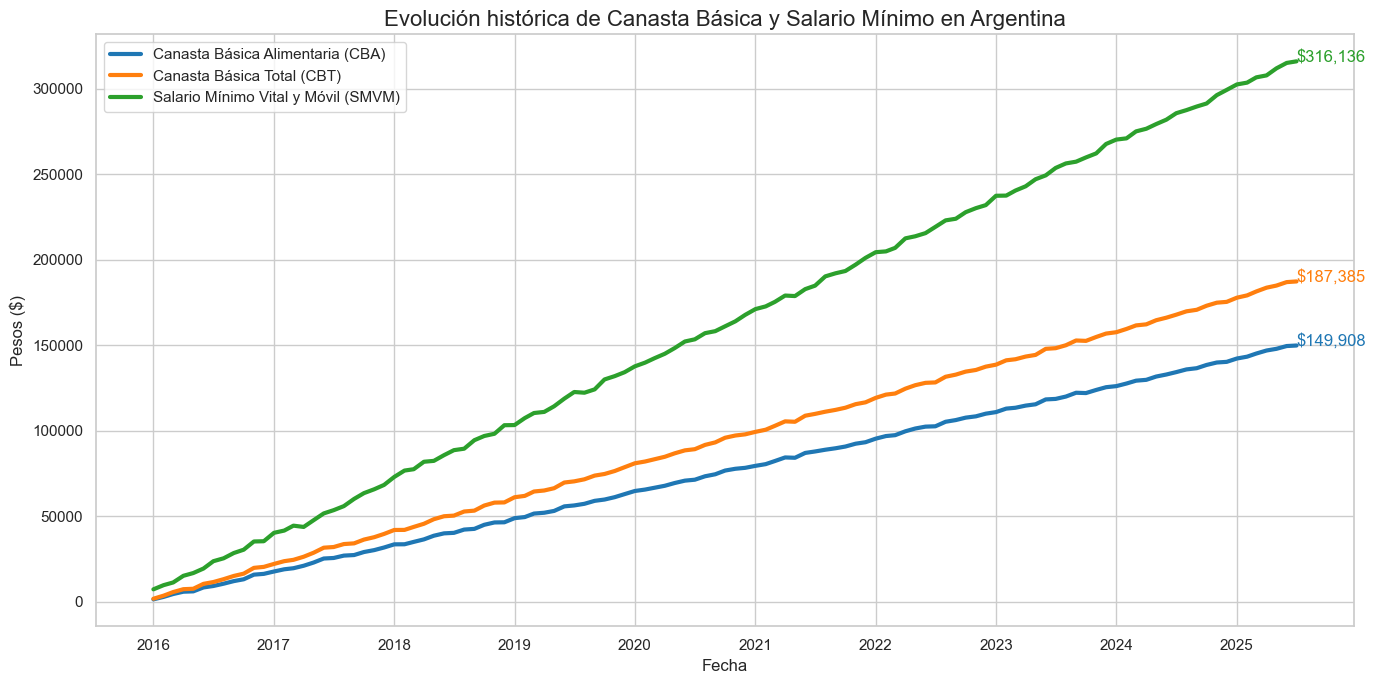

In [16]:
plt.figure()
plt.plot(df['fecha'], df['cba'], label='Canasta Básica Alimentaria (CBA)', color='#1f77b4', linewidth=3)
plt.plot(df['fecha'], df['cbt'], label='Canasta Básica Total (CBT)', color='#ff7f0e', linewidth=3)
plt.plot(df['fecha'], df['smvm'], label='Salario Mínimo Vital y Móvil (SMVM)', color='#2ca02c', linewidth=3)

# Anotaciones finales
plt.text(df['fecha'].iloc[-1], df['cba'].iloc[-1], f"${int(df['cba'].iloc[-1]):,}", color='#1f77b4', fontsize=12)
plt.text(df['fecha'].iloc[-1], df['cbt'].iloc[-1], f"${int(df['cbt'].iloc[-1]):,}", color='#ff7f0e', fontsize=12)
plt.text(df['fecha'].iloc[-1], df['smvm'].iloc[-1], f"${int(df['smvm'].iloc[-1]):,}", color='#2ca02c', fontsize=12)

plt.title('Evolución histórica de Canasta Básica y Salario Mínimo en Argentina', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Pesos ($)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### 💰 ¿Cuántas canastas básicas cubre el salario mínimo?

Este gráfico muestra cuántas veces el SMVM alcanza para cubrir:
- la CBA (alimentaria)
- la CBT (total)

La línea punteada gris representa el umbral mínimo (1 canasta). Cuando las líneas bajan de ese valor, significa que un salario mínimo **ya no cubre ni siquiera una canasta básica**.


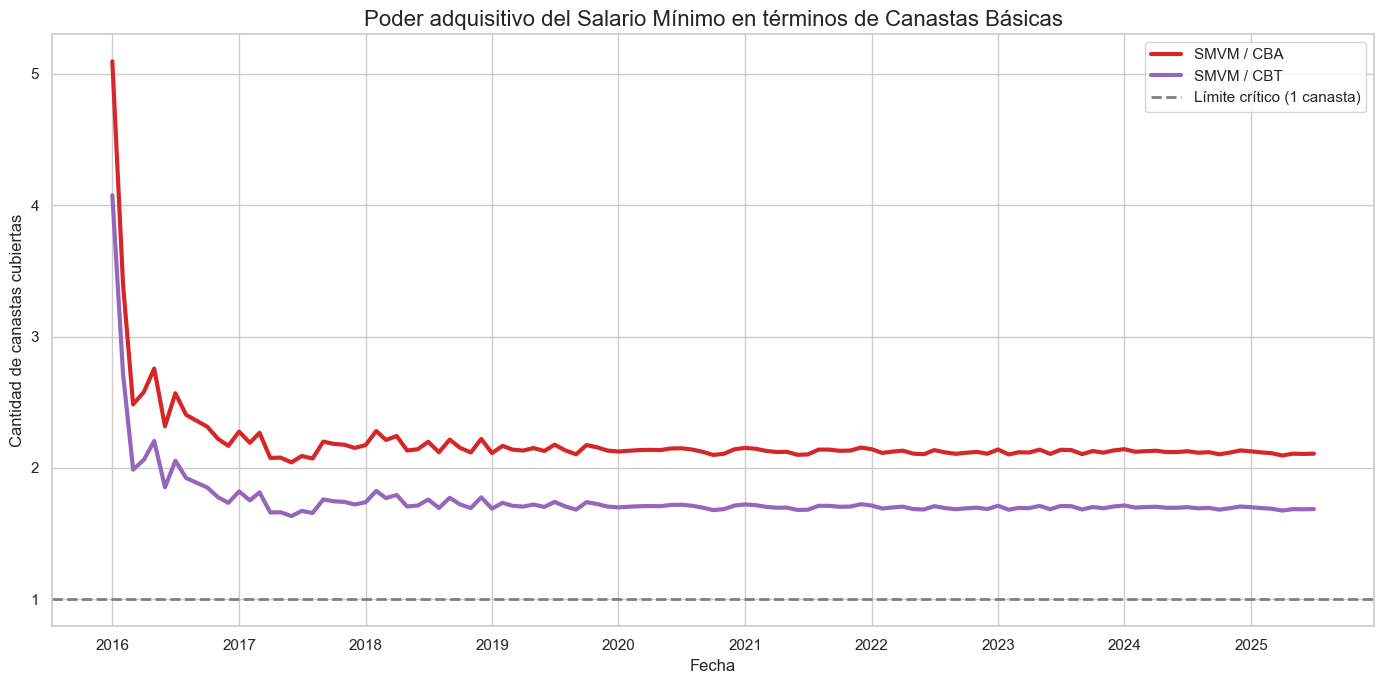

In [17]:
plt.figure()
plt.plot(df['fecha'], df['cba_cubierta'], label='SMVM / CBA', color='#d62728', linewidth=3)
plt.plot(df['fecha'], df['cbt_cubierta'], label='SMVM / CBT', color='#9467bd', linewidth=3)
plt.axhline(1, color='gray', linestyle='--', linewidth=2, label='Límite crítico (1 canasta)')

plt.title('Poder adquisitivo del Salario Mínimo en términos de Canastas Básicas', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de canastas cubiertas')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔥 Inflación mensual por sector (Heatmap)

Cada fila representa un sector económico (alimentos, transporte, salud, etc.)  
Cada columna es un mes entre 2016 y 2025.

Cuanto más rojo, mayor fue el índice de precios ese mes en ese sector.  
Sirve para identificar visualmente **los períodos más inflacionarios** y **qué sectores lideraron esos aumentos**.


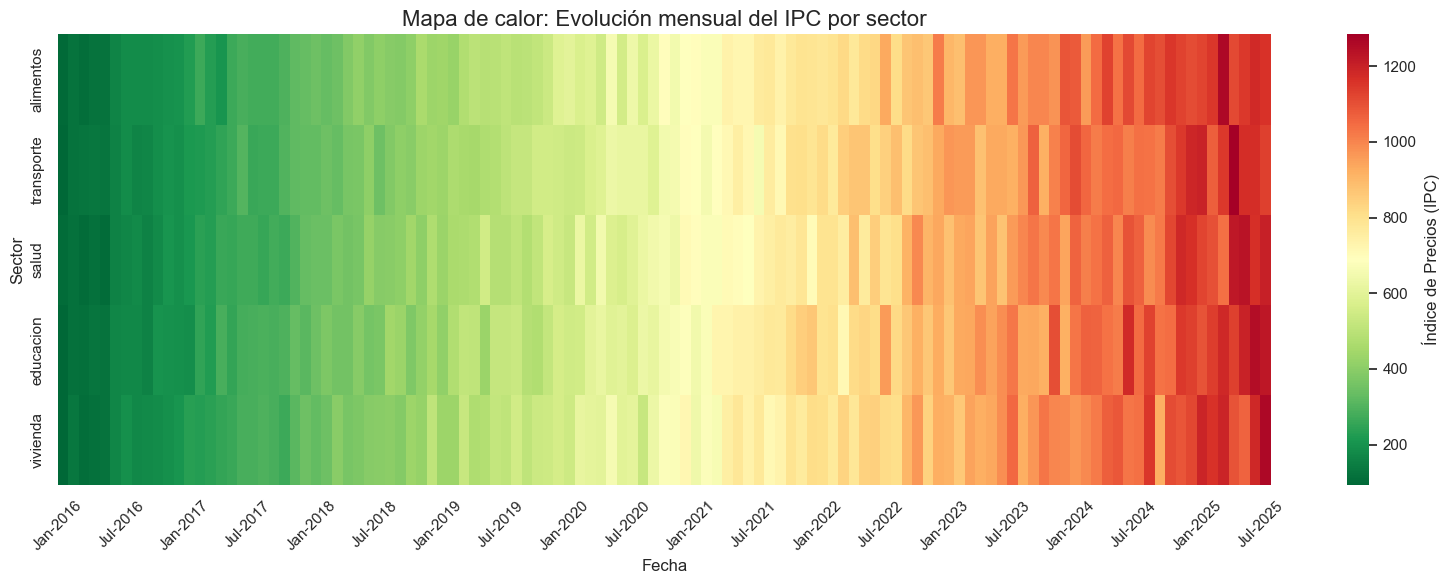

In [20]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 6))
sns.heatmap(df_sectores, cmap='RdYlGn_r', cbar_kws={'label': 'Índice de Precios (IPC)'})

plt.title('Mapa de calor: Evolución mensual del IPC por sector', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Sector')

# Formatear fechas en el eje X
xticks = df_sectores.columns[::6]  # Cada 6 meses aprox
plt.xticks(ticks=range(0, len(df_sectores.columns), 6), labels=[f.strftime('%b-%Y') for f in xticks], rotation=45)

plt.tight_layout()
plt.show()


### 📦 Contribución mensual al IPC por sector (barras apiladas)

Este gráfico muestra cómo cada sector aporta al índice de precios mensual.  
Sirve para analizar el peso relativo de cada división (alimentos, salud, etc.) en la inflación total.

Es útil para entender **qué rubros empujan más la inflación mes a mes**.


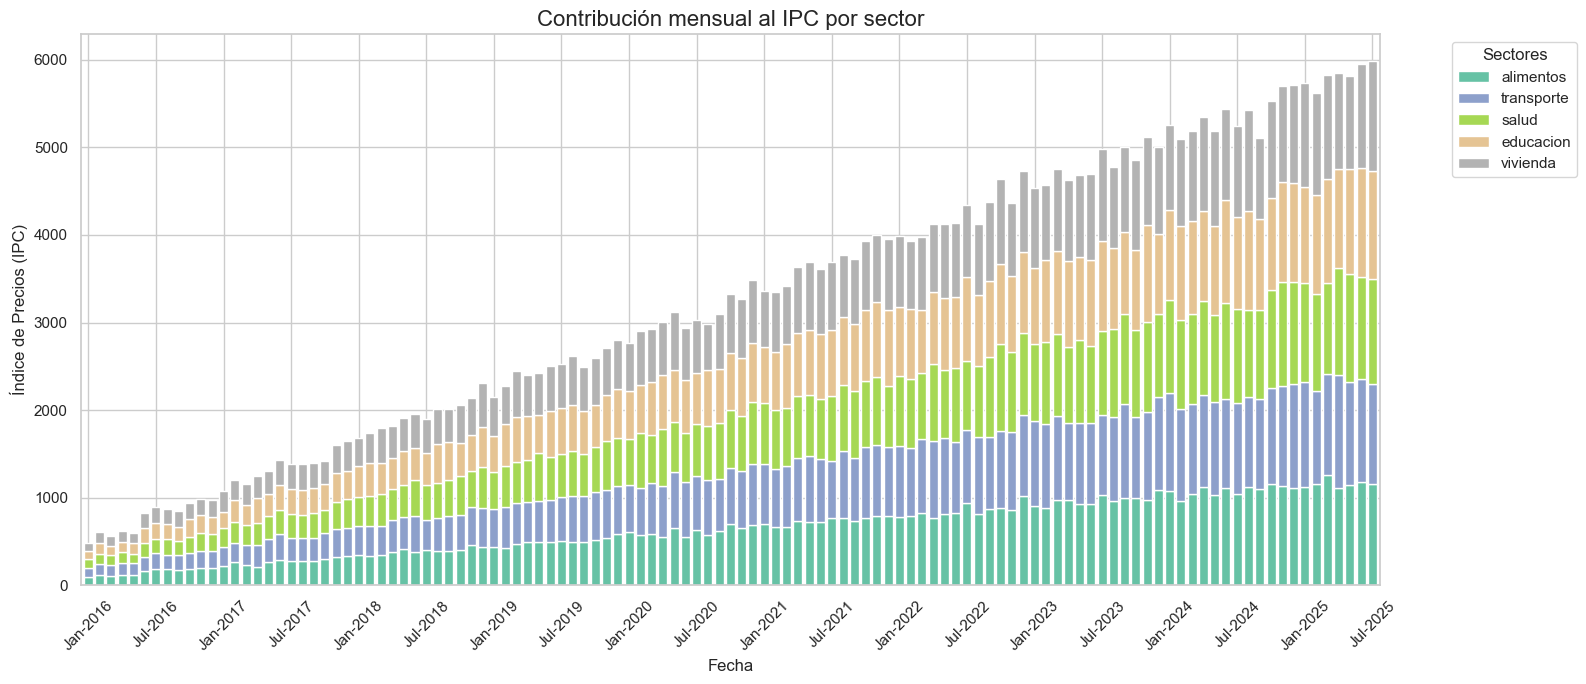

In [22]:
fig, ax = plt.subplots(figsize=(16, 7))

# Reducir densidad de fechas en eje X
df_plot = df.set_index('fecha')[sectores]
df_plot.plot(kind='bar', stacked=True, colormap='Set2', width=0.8, ax=ax)

# Mostrar solo algunas fechas (cada 6 meses)
xticks = df_plot.index[::6]
ax.set_xticks(range(0, len(df_plot), 6))
ax.set_xticklabels([x.strftime('%b-%Y') for x in xticks], rotation=45)

ax.set_title('Contribución mensual al IPC por sector', fontsize=16)
ax.set_xlabel('Fecha')
ax.set_ylabel('Índice de Precios (IPC)')
ax.legend(title='Sectores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🧠 Conclusiones finales del análisis

Este proyecto lo hice como parte de mi formación en programación y análisis de datos, con el objetivo de practicar el uso de Python, pandas, matplotlib y seaborn, y al mismo tiempo aplicar todo eso a un tema real y relevante como es la inflación en Argentina.

Acá algunas cosas que observé al trabajar con los datos:

- 📉 El salario mínimo crece, pero **las canastas básicas aumentan más rápido**, lo que significa que en la práctica la gente puede comprar menos con lo mismo.

- ⚠️ Hay varios momentos donde **el SMVM no alcanza ni para cubrir la canasta alimentaria**, lo que marca una situación de vulnerabilidad económica fuerte para quienes cobran ese ingreso.

- 🔥 Alimentos, salud y transporte son los sectores que **más empujan la inflación**, según los datos del INDEC. Eso se nota claro en el heatmap y en las barras apiladas.

- 🕵️‍♂️ Me gustó ver cómo los distintos gráficos ayudan a entender mejor el contexto: algunos muestran la evolución general, otros los picos sectoriales, y otros la composición del IPC mes a mes.

El objetivo fue mostrar no solo los datos, sino también saber **cómo contarlos de forma visual y clara**, que es lo que se busca hoy en día en muchos trabajos de análisis.

Este proyecto es parte de mi portfolio personal y está disponible en mi GitHub para seguir aprendiendo y mejorarlo en el futuro.



## 📊 Bonus visual: Evolución interactiva de Canasta Básica y Salario Mínimo


In [23]:
import plotly.graph_objects as go

fig = go.Figure()

# Línea SMVM
fig.add_trace(go.Scatter(
    x=df['fecha'],
    y=df['smvm'],
    mode='lines+markers',
    name='Salario Mínimo (SMVM)',
    line=dict(color='green', width=2)
))

# Línea CBA
fig.add_trace(go.Scatter(
    x=df['fecha'],
    y=df['cba'],
    mode='lines+markers',
    name='Canasta Básica Alimentaria (CBA)',
    line=dict(color='blue', width=2)
))

# Línea CBT
fig.add_trace(go.Scatter(
    x=df['fecha'],
    y=df['cbt'],
    mode='lines+markers',
    name='Canasta Básica Total (CBT)',
    line=dict(color='orange', width=2)
))

# Diseño del gráfico
fig.update_layout(
    title='Evolución interactiva: CBA, CBT y Salario Mínimo',
    xaxis_title='Fecha',
    yaxis_title='Pesos ($)',
    hovermode='x unified',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.5)'),
    template='plotly_white'
)

fig.show()
